In [1]:
from dstaster import *

In [2]:
# Load data
collection = pd.read_csv("tate/paintings.csv", index_col=0)

collection['ratio'] = collection['height'] / collection['width']
collection

,artist,title,year,groundtruth,height,width,ratio
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920,0.800521
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500,1.216000
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600,1.211667
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219,0.749795
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394,1.370558
...,...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022,1.255382
T14823,Unknown artist,Leon Trotsky,1980,P,510,480,1.062500
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116,0.591398
T14824,Unknown artist,Leon Trotsky,1980,P,638,511,1.248532


In [4]:
iport = collection['ratio'] >= 1.2
iland = collection['ratio'] <= .8
irest = (~iland) & (~iport)

collection['ratio_model'] = 'O'
collection.loc[iland,'ratio_model'] = 'L'
collection.loc[iport,'ratio_model'] = 'P'

collection

,artist,title,year,groundtruth,height,width,ratio,ratio_model
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920,0.800521,O
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500,1.216000,P
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600,1.211667,P
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219,0.749795,L
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394,1.370558,P
...,...,...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022,1.255382,P
T14823,Unknown artist,Leon Trotsky,1980,P,510,480,1.062500,O
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116,0.591398,L
T14824,Unknown artist,Leon Trotsky,1980,P,638,511,1.248532,P


In [5]:
collection[collection['groundtruth'] == 'L'].sort_values('ratio')[:5]

,artist,title,year,groundtruth,height,width,ratio,ratio_model
N01235,John Constable,East Bergholt House,1809,L,225,686,0.327988,L
N05212,Evelyn Dunbar,Winter Garden,1929,L,305,914,0.333698,L
N05272,Charles Spencelayh,Rochester Castle,1895,L,225,610,0.368852,L
N01205,Frederick Lee Bridell,"The Woods of Sweet Chestnut above Varenna, Lak...",1860,L,559,1505,0.371429,L
N04764,"Unknown artist, Britain",Greenwich Hospital,1750,L,337,900,0.374444,L


In [6]:
collection[collection['groundtruth'] == 'P'].sort_values('ratio')[-5:]

,artist,title,year,groundtruth,height,width,ratio,ratio_model
T11787,Clive Branson,Portrait of a Worker,1930,P,610,250,2.440000,P
N04673,Walter Richard Sickert,Miss Gwen Ffrangcon-Davies as Isabella of France,1932,P,2451,921,2.661238,P
T02141,R.B. Kitaj,The Orientalist,1976,P,2438,768,3.174479,P
N01549,Albert Moore,Blossoms,1881,P,1473,464,3.174569,P
N04893,Glyn Warren Philpot,Mrs Gerard Simpson,1937,P,978,244,4.008197,P


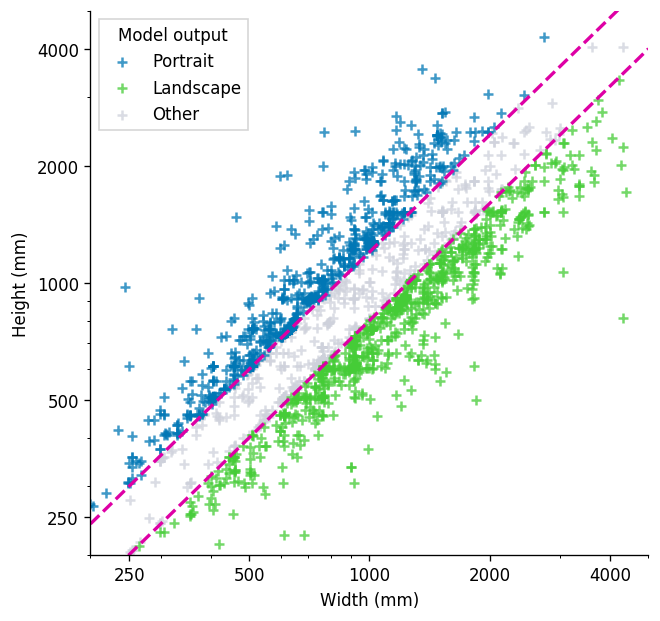

In [10]:
fig, ax = plt.subplots(figsize=(6,6), dpi=120)

ax.set_xlabel('Width (mm)')
ax.set_ylabel('Height (mm)')

ax.set_xlim(200, 5000)
ax.set_ylim(200, 5000)

ax.set_xscale('log')
ax.set_yscale('log')

for ix, name, col in zip([irest,iland,iport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)

ax.plot([200,5000], [200*1.2,5000*1.2], color=colors['pink'], ls='--', lw=2 )
ax.plot([200,5000], [200*.8,5000*.8], color=colors['pink'], ls='--', lw=2 )

# ax.get_xaxis().get_major_formatter().labelOnlyBase = False
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([250, 500,1000,2000,4000])
ax.set_yticks([250, 500,1000,2000,4000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Reverse legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Model output')


fig.savefig('images/1.9-model-scatter.svg')
pass

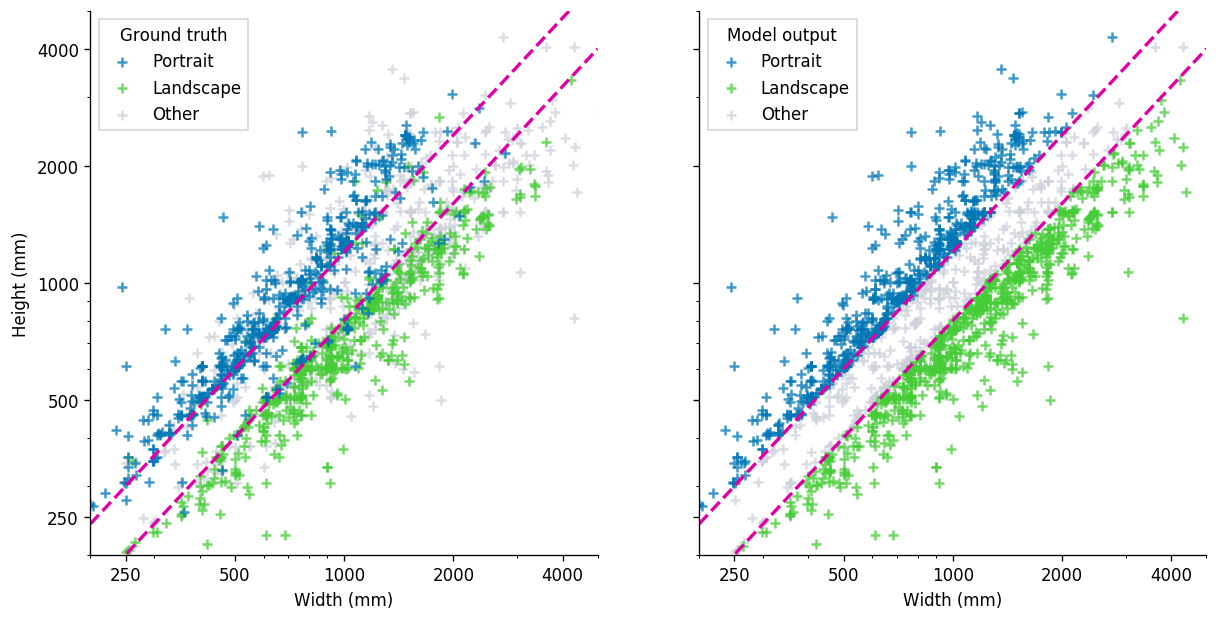

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=120, sharey=True)

ax1, ax2 = axes

ax1.set_ylabel('Height (mm)')
for ax in axes:
    ax.set_xlabel('Width (mm)')

    ax.set_xlim(200, 5000)
    ax.set_ylim(200, 5000)

    ax.set_xscale('log')
    ax.set_yscale('log')

tland = collection['groundtruth'] == 'L'
tport = collection['groundtruth'] == 'P'
trest = (~tland) & (~tport)

for ix, name, col in zip([trest,tland,tport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax1.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)

for ix, name, col in zip([irest,iland,iport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax2.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)    
    
for ax, title in zip(axes, ['Ground truth', 'Model output']):
    ax.plot([200,5000], [200*1.2,5000*1.2], color=colors['pink'], ls='--', lw=2 )
    ax.plot([200,5000], [200*.8,5000*.8], color=colors['pink'], ls='--', lw=2 )

    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xticks([250, 500,1000,2000,4000])
    ax.set_yticks([250, 500,1000,2000,4000])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Reverse legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title=title)

    
fig.savefig('images/1.9-model-gt-scatter.svg')
pass

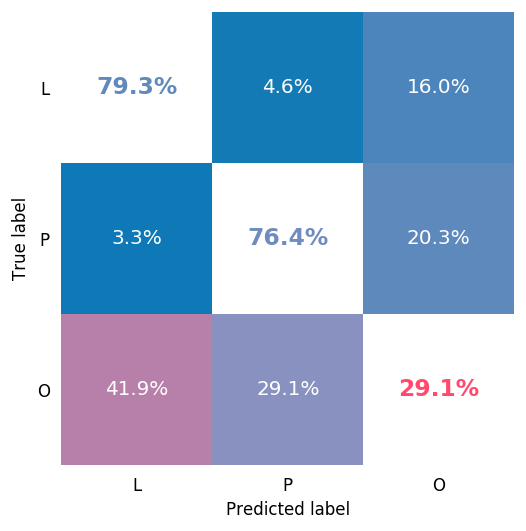

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

truth = collection['groundtruth']
pred = collection['ratio_model']

fig, ax = plt.subplots(figsize=(5.5,5), dpi=120)
plot_confusion_matrix(truth, pred, 'LPO', ax)

fig.savefig('images/1.9-confusion.svg')

In [9]:
collection[['ratio_model']].to_csv('tate/ratio_model.csv')